# By Purvita Mandal



# THE SPARKS FOUNDATION


Data science and business analyst internship

Task1:Prediction using supervised model


In task1 we will predict the percentage of marks that a student is expected to score based upon the number of hours they have studied. Here we will apply  a simple linear regression model involving two variables.

In [1]:
#First we import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Now we read data from the remote link
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("The data has been imported successfully and few of them are displayed below")
data.head(20)

The data has been imported successfully and few of them are displayed below


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


We will plot our data on a 2D graph to glance at the relationship shared between the data.We make a scatterplot for this purpose

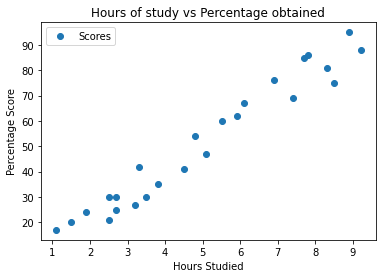

In [3]:
#Plotting the distribution of the scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours of study vs Percentage obtained')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

The graph clearly suggests a positive association between number of hours studied and percentage score obtained.

# Preparing the data

Here we divide the data into "attributes"(i.e input) and "lables"(i.e output) 

In [4]:
# Hours studied by a student is denoted by variable x
# Percentage score obtained by a student is denoted by variable y
x = data.iloc[:, :-1].values 
y = data.iloc[:, 1].values



In [6]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [27]:
# Now that we have our attributes and labels we can split the data into training and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

# Training the algorithm

In [31]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


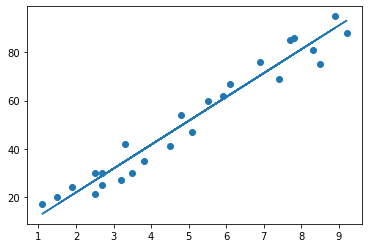

In [32]:
# We now plot the Regression Line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making the predictions

In [33]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [34]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [39]:
#  Testing with your own data
array=np.array(8.25)
hours=array.reshape(-1,1)
p=regressor.predict(hours)
prediction=p.ravel()[0]
print("No of Hours = {}".format(hours.ravel()[0]))
print("Predicted Score = {}".format(prediction))

No of Hours = 8.25
Predicted Score = 83.78107600673313


In [41]:
print("If a student stuies 8.25 hours a day he /she is expected to score {}".format(prediction))

If a student stuies 8.25 hours a day he /she is expected to score 83.78107600673313


# Evaluating the model

Finally we evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [42]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
